# trainTWO model8_SPRING

WITH SENTENCE : 봄바람에 꽃잎도 방긋방긋 웃으며

springTWO = {0:'season', 1:'warm', 2:'wind', 3:'because_1', 4:'because_2', 5:'flower', 6:'together', 7:'bright', 8:'smile'}

- springTWO.h5(1): 200/200/200/200/200/200/200/200/200 // epoch=100 // acc:100%
- springTWO.h5(2):       epoch=100
- springTWO.h5(3):       epoch=100
- springTWO.h5(4):       epoch=100
- springTWO.h5(5):       epoch=100

In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from itertools import chain

springTWO = {0:'season', 1:'warm', 2:'wind', 3:'because_1', 4:'because_2', 5:'flower', 6:'together', 7:'bright', 8:'smile'}
actions = []

for v in springTWO.values():
    actions.append(v)
print(actions)

['season', 'warm', 'wind', 'because_1', 'because_2', 'flower', 'together', 'bright', 'smile']


In [4]:
# cloudTWO
data = np.concatenate([
                       # because_1 : 200
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_because_1_1636033559.npy'),
                       # because_2 : 200
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_because_2_1636033559.npy'),
                       # bright : 200
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_bright_1636033559.npy'),
                       # flower : 200
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_flower_1636033559.npy'),
                       # season : 200
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_season_1636033559.npy'),
                       # smile : 200
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_smile_1636033559.npy'),
                       # together : 200
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_together_1636033559.npy'),
                       # warm : 200
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_warm_1636033559.npy'),
                       # wind : 200
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_wind_1636033559.npy')    
], axis=0)

data.shape

(1710, 10, 144)

In [5]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(1710, 10, 143)
(1710,)


In [6]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(1710, 9)

In [7]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1539, 10, 143) (1539, 9)
(171, 10, 143) (171, 9)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                53248     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 297       
Total params: 55,625
Trainable params: 55,625
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/100
49/49 [==============================] - 2s 15ms/step - loss: 32.9429 - acc: 0.1904 - val_loss: 5.3614 - val_acc: 0.4035

Epoch 00001: val_acc improved from -inf to 0.40351, saving model to models/model.h5
Epoch 2/100
49/49 [==============================] - 0s 9ms/step - loss: 3.0568 - acc: 0.4535 - val_loss: 1.9059 - val_acc: 0.5673

Epoch 00002: val_acc improved from 0.40351 to 0.56725, saving model to models/model.h5
Epoch 3/100
49/49 [==============================] - 0s 9ms/step - loss: 1.1872 - acc: 0.6355 - val_loss: 1.2478 - val_acc: 0.6784

Epoch 00003: val_acc improved from 0.56725 to 0.67836, saving model to models/model.h5
Epoch 4/100
49/49 [==============================] - 0s 9ms/step - loss: 0.8494 - acc: 0.7037 - val_loss: 0.7689 - val_acc: 0.7953

Epoch 00004: val_acc improved from 0.67836 to 0.79532, saving model to models/model.h5
Epoch 5/100
49/49 [==============================] - 0s 10ms/step - loss: 0.6592 - acc: 0.7823 - val_loss: 0.6260 - val_acc: 

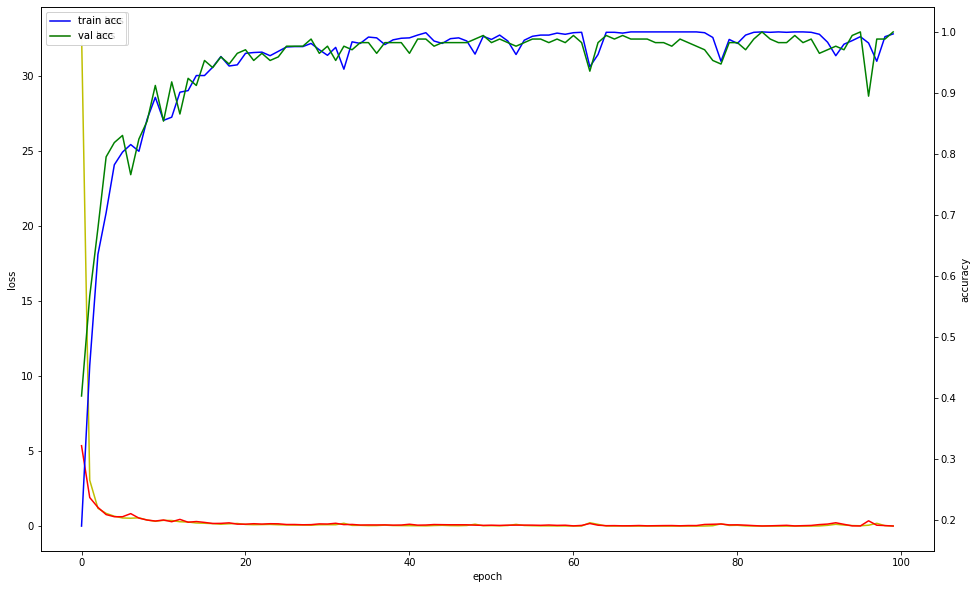

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [11]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[153,   0],
        [  0,  18]],

       [[149,   0],
        [  0,  22]],

       [[152,   0],
        [  0,  19]],

       [[149,   0],
        [  0,  22]],

       [[149,   0],
        [  0,  22]],

       [[158,   0],
        [  0,  13]],

       [[150,   0],
        [  0,  21]],

       [[157,   0],
        [  0,  14]],

       [[151,   0],
        [  0,  20]]])

In [12]:
from keras.models import load_model

model.save('springTWO.h5')

from google.colab import files
files.download('springTWO.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>